In [1]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_olivetti_faces

In [2]:
oliv = fetch_olivetti_faces()
X, y = oliv.data, oliv.target
print(X.shape)

(400, 4096)


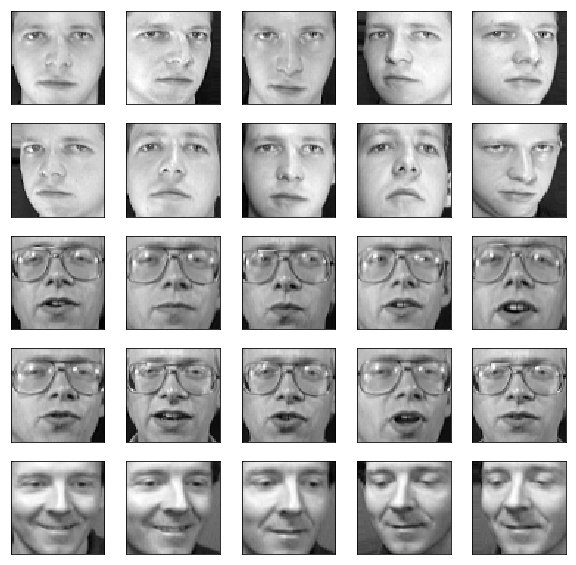

In [3]:
fig = plt.figure(figsize=(10,10))

for i in range(0,25):
    ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[])
    ax.imshow(X[i,:].reshape(64,64), cmap=plt.cm.gray, interpolation='nearest')

plt.show()

In [4]:
n_components = 32
pca_model = PCA(n_components)
X_projected = pca_model.fit_transform(X)
print(X_projected.shape)

(400, 32)


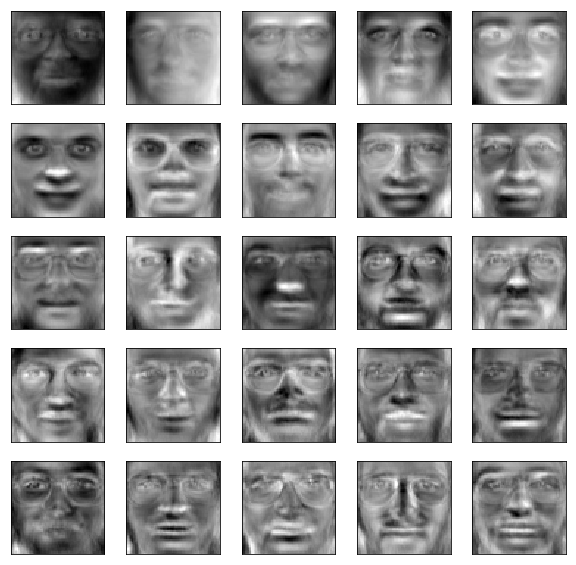

In [5]:
fig = plt.figure(figsize=(10, 10))

for i in range(25):
    ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[])
    ax.imshow(np.reshape(pca_model.components_[i,:], (64,64)), cmap=plt.cm.gray, interpolation='nearest')

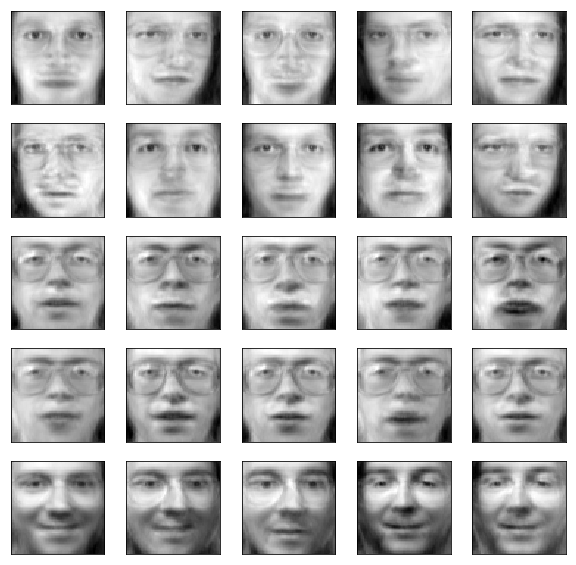

In [6]:
X_reconstructed = pca_model.inverse_transform(X_projected)
X_reconstructed_images = np.reshape(X_reconstructed, (-1, 64, 64))

fig = plt.figure(figsize=(10,10))

for i in range(25):
    ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[])
    ax.imshow(X_reconstructed_images[i], cmap=plt.cm.gray, interpolation='nearest')

In [7]:
print(np.sum(pca_model.explained_variance_ratio_))

0.82498


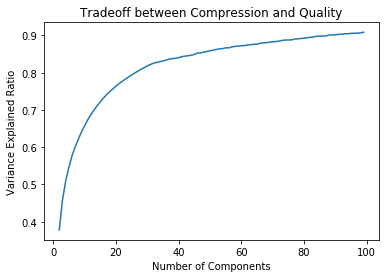

In [8]:
n_components_samples = list(range(2, 100))
variances = []
for n_components_sample in n_components_samples:
    pca_model = PCA(n_components_sample)
    X_proj = pca_model.fit_transform(X)
    variance = np.sum(pca_model.explained_variance_ratio_)
    variances.append(variance)

plt.title("Tradeoff between Compression and Quality")
plt.xlabel("Number of Components")
plt.ylabel("Variance Explained Ratio")
plt.plot(n_components_samples, variances)
plt.show()


In [ ]:
40./(64*64)

Original


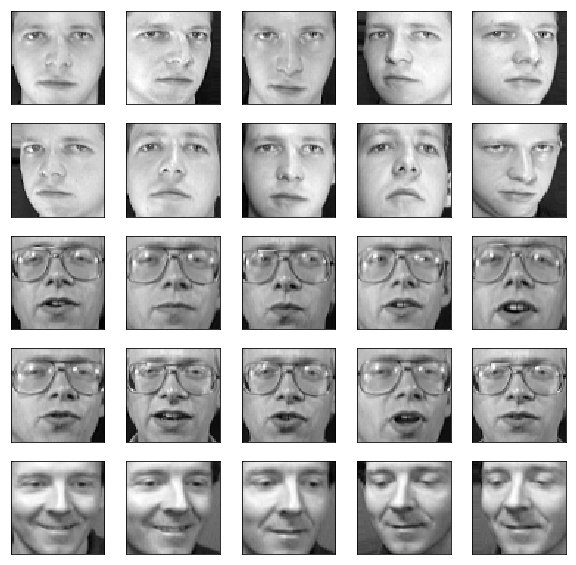

Reconstructed


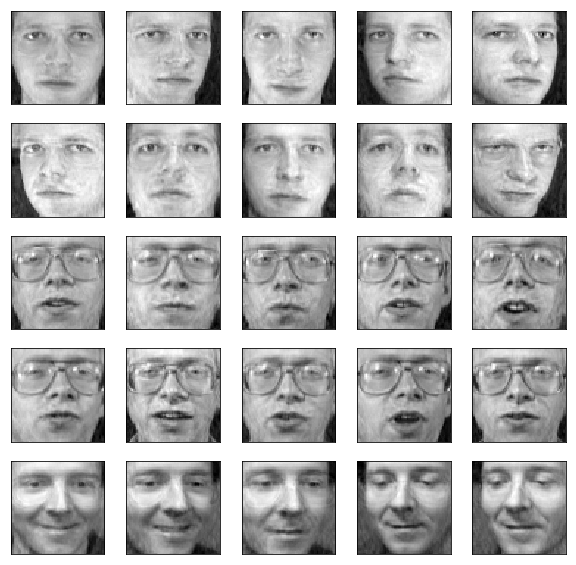

In [9]:
# playground to visualize quality changes

n_components = 200
pca_model = PCA(n_components)
X_projected = pca_model.fit_transform(X)

X_reconstructed = pca_model.inverse_transform(X_projected)
X_reconstructed_images = np.reshape(X_reconstructed, (-1, 64, 64))

print('Original')

fig = plt.figure(figsize=(10,10))

for i in range(0,25):
    ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[])
    ax.imshow(X[i,:].reshape(64,64), cmap=plt.cm.gray, interpolation='nearest')

plt.show()

print('Reconstructed')

fig = plt.figure(figsize=(10,10))

for i in range(25):
    ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[])
    ax.imshow(X_reconstructed_images[i], cmap=plt.cm.gray, interpolation='nearest')

plt.show()